In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.3
learning_rate=1e-4
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)

In [6]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


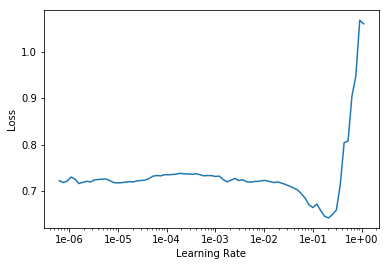

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:27
epoch  train_loss  valid_loss  accuracy
1      0.712888    0.660304    0.671498  (00:06)
2      0.653650    0.641976    0.599034  (00:07)
3      0.647768    0.612540    0.685990  (00:06)
4      0.625497    0.592107    0.705314  (00:07)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:17
epoch  train_loss  valid_loss  accuracy
1      0.644100    0.617516    0.690821  (00:17)
2      0.611784    0.612514    0.695652  (00:18)
3      0.581428    0.572905    0.729469  (00:19)
4      0.574914    0.535176    0.768116  (00:17)
5      0.541237    0.531610    0.758454  (00:20)
6      0.540341    0.475927    0.758454  (00:19)
7      0.512182    0.505193    0.787440  (00:19)
8      0.518106    0.476518    0.806763  (00:18)
9      0.484772    0.476669    0.806763  (00:20)
10     0.482098    0.462145    0.801932  (00:19)
11     0.519035    0.502996    0.763285  (00:16)
12     0.494850    0.482890    0.797101  (00:18)
13     0.508867    0.456084    0.792271  (00:17)
14     0.503165    0.469298    0.792271  (00:17)
15     0.491343    0.436192    0.811594  (00:16)
16     0.423637    0.435569    0.806763  (00:19)
17     0.415016    0.383654    0.811594  (00:19)
18     0.395217    0.402556    0.797101  (00:20)
19     0.388201    0.420334    0.806763  (00:21)
20     0.39

In [11]:
learn.validate()

[0.40423074, tensor(0.8068)]

In [12]:
accuracy_list.append(learn.validate()[1].item())

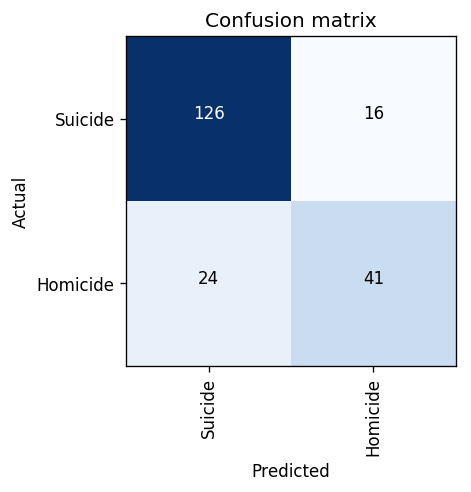

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

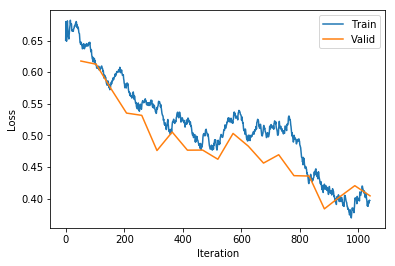

In [14]:
learn.recorder.plot_losses()

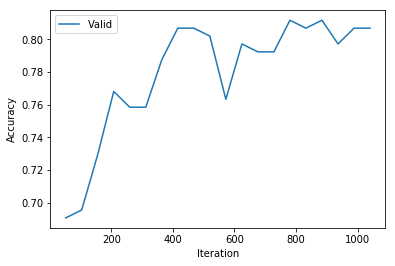

In [15]:
learn.recorder.plot_metrics()

In [16]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [17]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


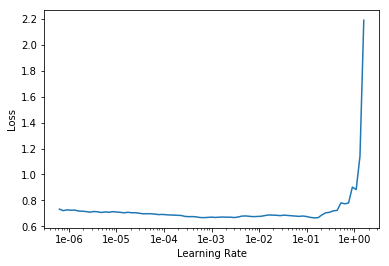

In [18]:
learn.recorder.plot()

In [19]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:26
epoch  train_loss  valid_loss  accuracy
1      0.678822    0.612019    0.748792  (00:06)
2      0.667858    0.563130    0.787440  (00:06)
3      0.634961    0.535426    0.782609  (00:06)
4      0.621117    0.528174    0.753623  (00:06)



In [20]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 05:45
epoch  train_loss  valid_loss  accuracy
1      0.628233    0.504534    0.758454  (00:16)
2      0.597329    0.510053    0.768116  (00:17)
3      0.571501    0.468735    0.763285  (00:18)
4      0.589562    0.456722    0.787440  (00:15)
5      0.582430    0.455777    0.768116  (00:16)
6      0.555529    0.445183    0.743961  (00:19)
7      0.537168    0.460397    0.806763  (00:16)
8      0.561118    0.401728    0.806763  (00:16)
9      0.510460    0.484664    0.811594  (00:18)
10     0.510301    0.394350    0.787440  (00:17)
11     0.508512    0.412771    0.840580  (00:19)
12     0.514457    0.369623    0.845411  (00:17)
13     0.506820    0.403915    0.835749  (00:15)
14     0.490595    0.408030    0.816425  (00:16)
15     0.453053    0.365124    0.845411  (00:19)
16     0.469656    0.359203    0.845411  (00:16)
17     0.429363    0.377520    0.826087  (00:20)
18     0.463842    0.350439    0.855072  (00:15)
19     0.470147    0.367608    0.850242  (00:15)
20     0.45

In [21]:
learn.validate()

[0.3723419, tensor(0.8406)]

In [22]:
accuracy_list.append(learn.validate()[1].item())

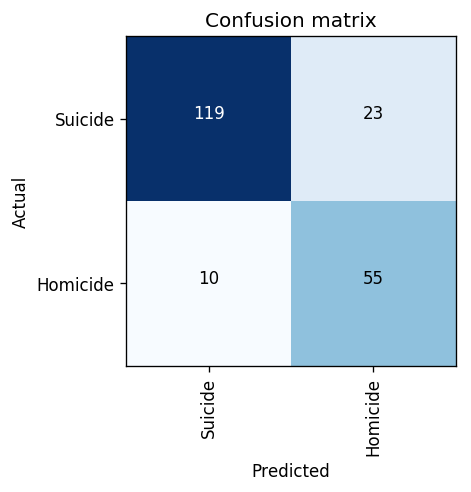

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

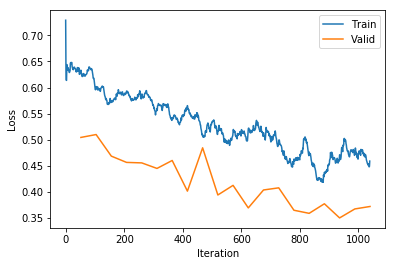

In [24]:
learn.recorder.plot_losses()

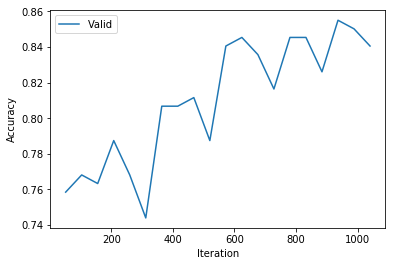

In [25]:
learn.recorder.plot_metrics()

In [26]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [27]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


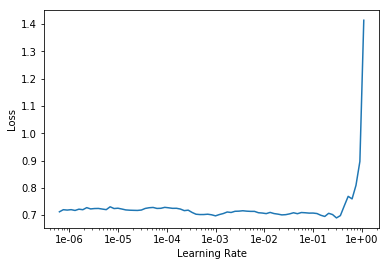

In [28]:
learn.recorder.plot()

In [29]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:28
epoch  train_loss  valid_loss  accuracy
1      0.678612    0.614714    0.695652  (00:06)
2      0.624366    0.591934    0.681159  (00:07)
3      0.604326    0.561294    0.719807  (00:07)
4      0.615119    0.525208    0.743961  (00:07)



In [30]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:10
epoch  train_loss  valid_loss  accuracy
1      0.548738    0.519152    0.748792  (00:21)
2      0.572380    0.466821    0.797101  (00:20)
3      0.571903    0.524064    0.743961  (00:17)
4      0.560075    0.513210    0.763285  (00:19)
5      0.570388    0.501511    0.768116  (00:16)
6      0.543647    0.528503    0.772947  (00:17)
7      0.502410    0.473249    0.748792  (00:20)
8      0.521600    0.469339    0.787440  (00:17)
9      0.496914    0.484291    0.772947  (00:20)
10     0.470365    0.458167    0.768116  (00:19)
11     0.502371    0.435723    0.797101  (00:16)
12     0.490271    0.421136    0.787440  (00:18)
13     0.470166    0.436940    0.792271  (00:19)
14     0.443493    0.440889    0.777778  (00:20)
15     0.424957    0.459723    0.797101  (00:19)
16     0.477877    0.447074    0.792271  (00:15)
17     0.483799    0.453299    0.787440  (00:16)
18     0.485193    0.398879    0.811594  (00:17)
19     0.441715    0.418627    0.801932  (00:18)
20     0.41

In [31]:
learn.validate()

[0.41544586, tensor(0.8068)]

In [32]:
accuracy_list.append(learn.validate()[1].item())

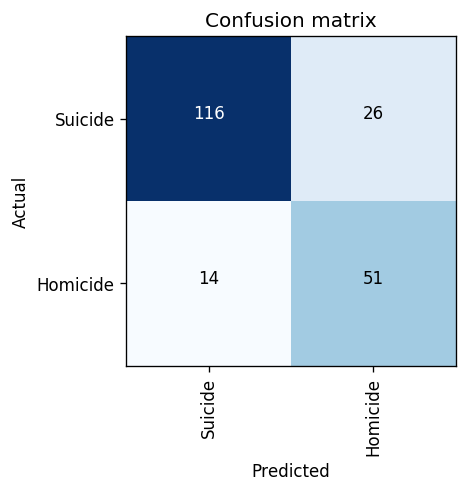

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

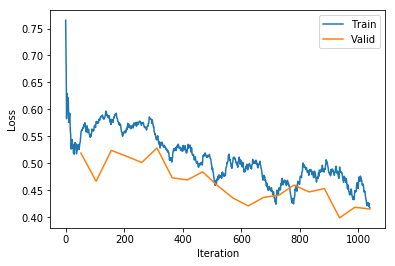

In [34]:
learn.recorder.plot_losses()

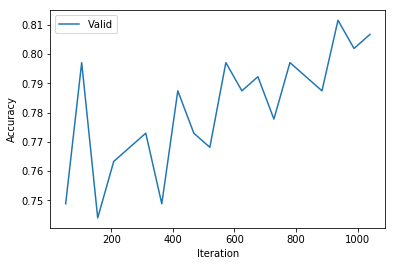

In [35]:
learn.recorder.plot_metrics()

In [36]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [37]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


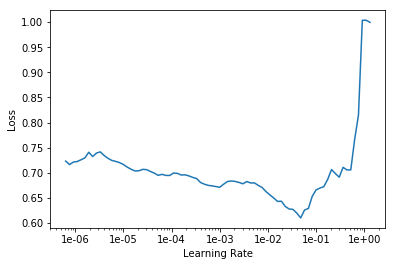

In [38]:
learn.recorder.plot()

In [39]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:26
epoch  train_loss  valid_loss  accuracy
1      0.659165    0.633587    0.710145  (00:06)
2      0.649934    0.562037    0.743961  (00:06)
3      0.628396    0.604447    0.700483  (00:06)
4      0.601556    0.561941    0.685990  (00:07)



In [40]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:03
epoch  train_loss  valid_loss  accuracy
1      0.569681    0.570416    0.739130  (00:19)
2      0.606813    0.568880    0.671498  (00:16)
3      0.579850    0.570145    0.700483  (00:17)
4      0.547266    0.606948    0.705314  (00:19)
5      0.558455    0.510387    0.748792  (00:16)
6      0.546642    0.453045    0.840580  (00:16)
7      0.496232    0.472598    0.777778  (00:20)
8      0.469674    0.454158    0.792271  (00:20)
9      0.482783    0.477340    0.826087  (00:16)
10     0.516592    0.438626    0.763285  (00:15)
11     0.488628    0.412906    0.821256  (00:18)
12     0.505279    0.443235    0.777778  (00:17)
13     0.447168    0.464634    0.768116  (00:20)
14     0.439509    0.452331    0.782609  (00:20)
15     0.463414    0.435673    0.777778  (00:16)
16     0.438531    0.418698    0.806763  (00:18)
17     0.428688    0.414036    0.806763  (00:20)
18     0.412144    0.390863    0.801932  (00:18)
19     0.423372    0.393309    0.792271  (00:17)
20     0.46

In [41]:
learn.validate()

[0.410403, tensor(0.7971)]

In [42]:
accuracy_list.append(learn.validate()[1].item())

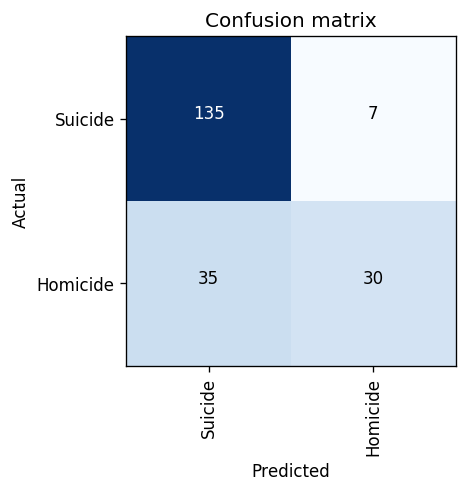

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

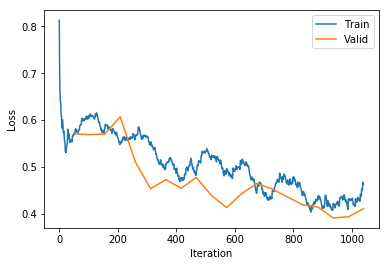

In [44]:
learn.recorder.plot_losses()

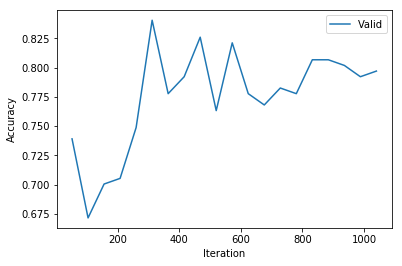

In [45]:
learn.recorder.plot_metrics()

In [46]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [47]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


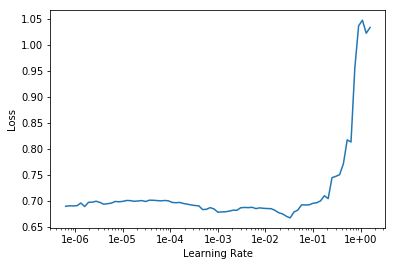

In [48]:
learn.recorder.plot()

In [49]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:28
epoch  train_loss  valid_loss  accuracy
1      0.673972    0.636788    0.642512  (00:06)
2      0.645147    0.628069    0.599034  (00:07)
3      0.624186    0.641617    0.584541  (00:06)
4      0.631893    0.600287    0.666667  (00:07)



In [50]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:04
epoch  train_loss  valid_loss  accuracy
1      0.647504    0.578527    0.719807  (00:17)
2      0.639457    0.523667    0.772947  (00:16)
3      0.601450    0.529992    0.787440  (00:19)
4      0.586729    0.494120    0.792271  (00:20)
5      0.586479    0.493818    0.811594  (00:17)
6      0.570983    0.507745    0.782609  (00:17)
7      0.541274    0.504502    0.801932  (00:17)
8      0.548393    0.482536    0.758454  (00:16)
9      0.530004    0.458341    0.816425  (00:19)
10     0.534558    0.439613    0.806763  (00:16)
11     0.495201    0.463880    0.816425  (00:18)
12     0.453965    0.434943    0.787440  (00:22)
13     0.425762    0.390407    0.801932  (00:21)
14     0.480073    0.441060    0.787440  (00:15)
15     0.494211    0.428450    0.797101  (00:15)
16     0.442429    0.403707    0.830918  (00:18)
17     0.425402    0.396568    0.850242  (00:19)
18     0.430349    0.366870    0.845411  (00:19)
19     0.450871    0.367714    0.835749  (00:15)
20     0.39

In [51]:
learn.validate()

[0.35622543, tensor(0.8502)]

In [52]:
accuracy_list.append(learn.validate()[1].item())

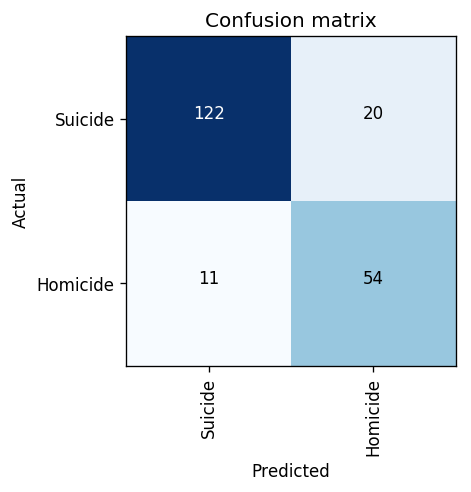

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

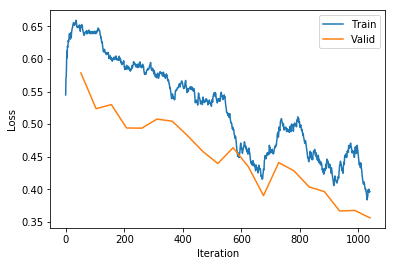

In [54]:
learn.recorder.plot_losses()

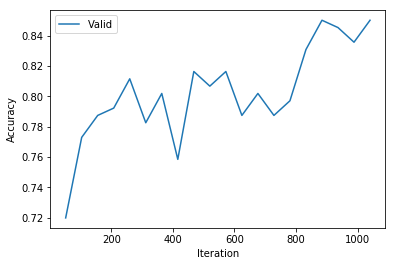

In [55]:
learn.recorder.plot_metrics()

In [56]:
print(accuracy_list)

[0.8067632913589478, 0.8405796885490417, 0.8067632913589478, 0.7971014380455017, 0.8502415418624878]


In [57]:
print(sum(accuracy_list)/len(accuracy_list))

0.8202898502349854


In [58]:

data_clas = TextClasDataBunch.from_csv(path_clas,'data_suicide_homicide_combined_train_test.csv', vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [59]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


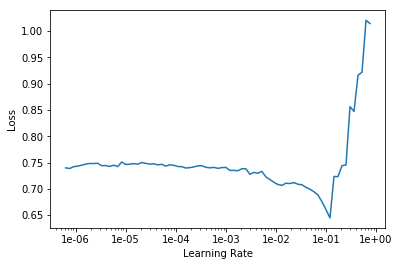

In [60]:
learn.recorder.plot()

In [61]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:31
epoch  train_loss  valid_loss  accuracy
1      0.716770    0.614244    0.741313  (00:07)
2      0.697615    0.563246    0.768340  (00:07)
3      0.658103    0.557502    0.783784  (00:08)
4      0.654304    0.520792    0.803089  (00:07)



In [62]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:29
epoch  train_loss  valid_loss  accuracy
1      0.572670    0.557470    0.772201  (00:25)
2      0.539836    0.494144    0.810811  (00:26)
3      0.584962    0.542172    0.776062  (00:21)
4      0.590212    0.454058    0.814672  (00:20)
5      0.551540    0.453289    0.822394  (00:22)
6      0.565426    0.459957    0.845560  (00:20)
7      0.523786    0.432264    0.857143  (00:25)
8      0.508021    0.400167    0.849421  (00:23)
9      0.468481    0.372896    0.845560  (00:25)
10     0.523169    0.399470    0.845560  (00:20)
11     0.499090    0.404656    0.861004  (00:22)
12     0.464785    0.382815    0.837838  (00:22)
13     0.424886    0.366447    0.849421  (00:25)
14     0.460485    0.380599    0.849421  (00:21)
15     0.442830    0.376193    0.845560  (00:23)
16     0.482376    0.365803    0.841699  (00:19)
17     0.439599    0.377359    0.837838  (00:24)
18     0.452756    0.344862    0.857143  (00:20)
19     0.482959    0.383876    0.841699  (00:19)
20     0.48

In [63]:
learn.validate()

[0.38104507, tensor(0.8378)]

In [64]:
accuracy_list.append(learn.validate()[1].item())

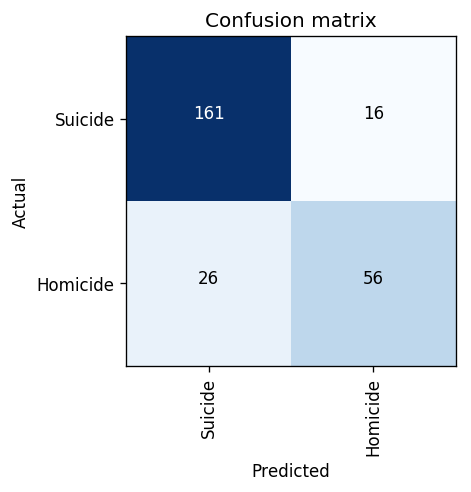

In [65]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

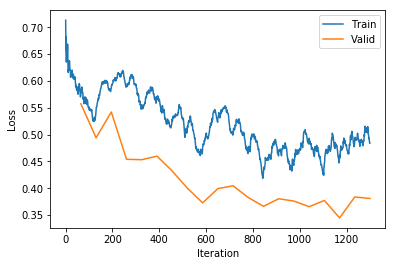

In [66]:
learn.recorder.plot_losses()

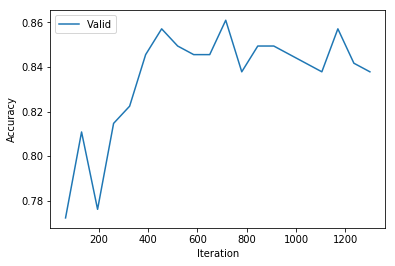

In [67]:
learn.recorder.plot_metrics()

In [71]:
learn.model.parameters

<bound method Module.parameters of SequentialRNN(
  (0): MultiBatchRNNCore(
    (encoder): Embedding(60002, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60002, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.12)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1)
      (6): Linear(in

In [68]:
import torch

torch.cuda.empty_cache()